## 1. Import Pakages

In [8]:
import torch
import torch.nn as nn
import torchvision.datasets as dset
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

## 2. 하이퍼파라미터 세팅

In [9]:
batch_size = 100
num_epochs = 5
learning_rate = 0.001

## 3. Dataset 및 DataLoader 정의

In [11]:
root = '../data/mnist'
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean=(0.5,), std=(0.5,))])
train_data = dset.MNIST(root=root, train=True, transform=transform, download=True)
test_data = dset.MNIST(root=root, train=False, transform=transform, download=True)
train_loader = torch.utils.data.DataLoader(
                 dataset=train_data,
                 batch_size=batch_size,
                 shuffle=True)
test_loader = torch.utils.data.DataLoader(
                 dataset=test_data,
                 batch_size=batch_size,
                 shuffle=False)

## 4. 데이터 시각화

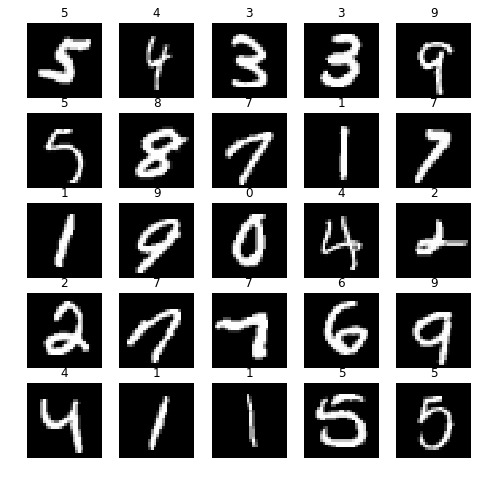

In [4]:
columns = 5
rows = 5
fig = plt.figure(figsize=(8,8))

for i in range(1, columns*rows+1):
    data_idx = np.random.randint(len(train_data))
    img = train_data[data_idx][0][0,:,:].numpy() # numpy()를 통해 torch Tensor를 numpy array로 변환
    label = train_data[data_idx][1]
    
    fig.add_subplot(rows, columns, i)
    plt.title(label)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
plt.show()

## 5. 네트워크 설계

In [6]:
class DNN(nn.Module):
    def __init__(self, num_classes=10):
        super(DNN, self).__init__()
        self.fc1 = nn.Linear(in_features=28*28, out_features=512)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(in_features=512, out_features=num_classes)
    
    def forward(self, x):
        x = x.view(x.size(0), -1) # flatten
        x_out = self.relu1(self.fc1(x))
        x_out = self.fc2(x_out)
        return x_out

## 6. 모델 생성 및 loss function, optimizer 정의

In [7]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model = DNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

## 7. Training

In [8]:
for epoch in range(num_epochs):
    for i, (imgs, labels) in enumerate(train_loader):
        imgs = imgs.to(device)
        labels = labels.to(device)
        outputs = model(imgs)
        loss = criterion(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        _, argmax = torch.max(outputs, 1)
        accuracy = (labels.cpu() == argmax.cpu()).float().mean()
        if (i+1) % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Accuracy: {:.2f}%'.format(
                epoch+1, num_epochs, i+1, len(train_loader), loss.item(), accuracy.item() * 100))

Epoch [1/5], Step [100/600], Loss: 1.2795, Accuracy: 48.00%
Epoch [1/5], Step [200/600], Loss: 1.1144, Accuracy: 56.00%
Epoch [1/5], Step [300/600], Loss: 1.1361, Accuracy: 56.00%
Epoch [1/5], Step [400/600], Loss: 1.1159, Accuracy: 56.00%


KeyboardInterrupt: 

## 8. Test

In [8]:
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for i, (imgs, labels) in enumerate(test_loader):
        imgs = imgs.to(device)
        labels = labels.to(device)
        outputs = model(imgs)
        _, argmax = torch.max(outputs, 1) # max()를 통해 최종 출력이 가장 높은 class 선택
        total += imgs.size(0)
        correct += (labels.cpu() == argmax.cpu()).sum().item()
    
    print('Test accuracy for {} images: {:.2f}%'.format(total, correct / total * 100))
model.train()

Test accuracy for 10000 images: 97.24%


DNN(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (relu2): ReLU()
)